In [17]:
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
import warnings

# Loading image data

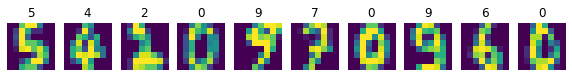

In [20]:
#Load data
n_classes = 10
digits = load_digits(n_class=n_classes)
X = digits.images
y = digits.target
n_total = X.shape[0]

#Shuffle
ind = np.random.permutation(n_total)
X = X[ind,:,:]
y = y[ind]

#Split into train and test data
n_test = int(n_total*.2)
X_test = X[:n_test]
y_test = y[:n_test]
X = X[n_test:]
y = y[n_test:]
n = X.shape[0]

#Plot
n_images = 10
plt.figure(figsize=[n_images,n_images])
for i in range(n_images):
    plt.subplot(1,n_images,i+1)
    plt.imshow(X[i])
    plt.axis('off')
    plt.title(str(y[i]))
plt.show()

# Image data shape issues

In [23]:
# clf = LogisticRegression().fit(X, y)

In [22]:
X.shape

(1438, 8, 8)

In [5]:
np.reshape(X,[n,-1]).shape

(1438, 64)

In [25]:
X = np.reshape(X,[n,-1])
X_test = np.reshape(X_test,[n_test,-1])

# Fitting a logistic regression model

## total number of itereations reached....

In [26]:
clf = LogisticRegression().fit(X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
clf = LogisticRegression(max_iter=10000).fit(X, y)

In [28]:
print('Iterations to convergence =', clf.n_iter_[0])

Iterations to convergence = 4024


In [29]:
n_predict = 20
print('Predicted values       =', clf.predict(X[:n_predict, :]))
print('Actual values          =', y[:n_predict])
print('Mean training accuracy =', clf.score(X, y)*100, '%')

Predicted values       = [5 4 2 0 9 7 0 9 6 0 8 2 1 9 4 6 8 3 3 9]
Actual values          = [5 4 2 0 9 7 0 9 6 0 8 2 1 9 4 6 8 3 3 9]
Mean training accuracy = 100.0 %


In [30]:
n_predict = 20
print('Predicted values       =', clf.predict(X_test[:n_predict, :]))
print('Actual values          =', y_test[:n_predict])
print('Mean test accuracy     =', clf.score(X_test, y_test)*100, '%')

Predicted values       = [1 7 9 9 3 3 6 6 1 9 3 6 7 7 9 2 9 2 2 8]
Actual values          = [1 7 9 9 3 3 6 6 1 9 3 6 7 7 9 2 9 2 2 8]
Mean test accuracy     = 96.10027855153204 %


In [31]:
#Ignore warnings otherwise output will blow up
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    #Check accuracy for different values of max_iter
    iter_vals = [2**s for s in range(12)]
    for i in iter_vals:
        clf = LogisticRegression(max_iter=i).fit(X, y)
        print('Iterations          =', i)
        print('Mean accuracy train =', clf.score(X, y)*100, '%')
        print('')

Iterations          = 1
Mean accuracy train = 78.6509040333797 %

Iterations          = 2
Mean accuracy train = 89.4297635605007 %

Iterations          = 4
Mean accuracy train = 91.86369958275382 %

Iterations          = 8
Mean accuracy train = 95.6884561891516 %

Iterations          = 16
Mean accuracy train = 98.53963838664812 %

Iterations          = 32
Mean accuracy train = 99.93045897079277 %

Iterations          = 64
Mean accuracy train = 100.0 %

Iterations          = 128
Mean accuracy train = 100.0 %

Iterations          = 256
Mean accuracy train = 100.0 %

Iterations          = 512
Mean accuracy train = 100.0 %

Iterations          = 1024
Mean accuracy train = 100.0 %

Iterations          = 2048
Mean accuracy train = 100.0 %



Is doing fewer iterations better?? When is it better?

## Prediction probabilities

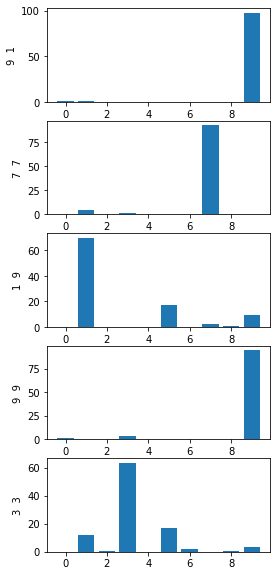

In [36]:
#Train new model
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    clf = LogisticRegression(max_iter=1, C=1).fit(X, y)

#See prediction values
n_predictions = 5
plt.figure(figsize=[4,2*n_predictions])
predictions = clf.predict(X_test[:n_predictions, :])
pred_prob = clf.predict_proba(X_test[:n_predictions, :])*100
for i in range(n_predictions):
    plt.subplot(n_predictions,1,i+1)
    plt.bar(np.unique(y),pred_prob[i,:])
    plt.ylabel( str(predictions[i]) + '  ' + str(y_test[i]) )
plt.show()

# Regularization

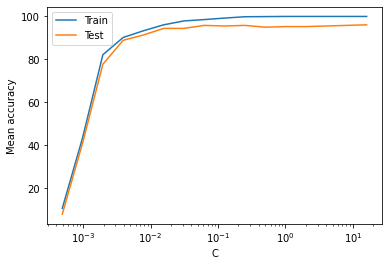

In [13]:
#Inputs
penalty = ['l1','l2','elasticnet','none'][0]
c_vals = [1.0/(2.0**s) for s in range(-4,12)]
verbose = False

#Ignore warnings otherwise output will blow up
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    #Check accuracy for different values of max_iter
    acc_train = []
    acc_test = []
    for c in c_vals:
        clf = LogisticRegression(C=c, max_iter=1000, penalty=penalty, l1_ratio=0.1, solver='saga').fit(X, y)
        acc_train.append(clf.score(X, y)*100)
        acc_test.append(clf.score(X_test, y_test)*100)
        if verbose:
            print('C                   =', c)
            print('Mean accuracy train =', acc_train[-1], '%')
            print('Mean accuracy test  =', acc_test[-1], '%')
            print('')
        
plt.semilogx(c_vals, acc_train)
plt.semilogx(c_vals, acc_test)
plt.legend(['Train','Test'])
plt.xlabel('C')
plt.ylabel('Mean accuracy')
plt.show()

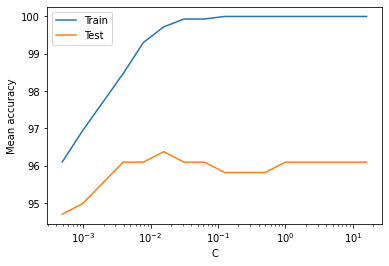

In [14]:
#Inputs
penalty = ['l1','l2','elasticnet','none'][1]
c_vals = [1.0/(2.0**s) for s in range(-4,12)]
verbose = False

#Ignore warnings otherwise output will blow up
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    #Check accuracy for different values of max_iter
    acc_train = []
    acc_test = []
    for c in c_vals:
        clf = LogisticRegression(C=c, max_iter=1000, penalty=penalty, l1_ratio=0.1, solver='saga').fit(X, y)
        acc_train.append(clf.score(X, y)*100)
        acc_test.append(clf.score(X_test, y_test)*100)
        if verbose:
            print('C                   =', c)
            print('Mean accuracy train =', acc_train[-1], '%')
            print('Mean accuracy test  =', acc_test[-1], '%')
            print('')
        
plt.semilogx(c_vals, acc_train)
plt.semilogx(c_vals, acc_test)
plt.legend(['Train','Test'])
plt.xlabel('C')
plt.ylabel('Mean accuracy')
plt.show()

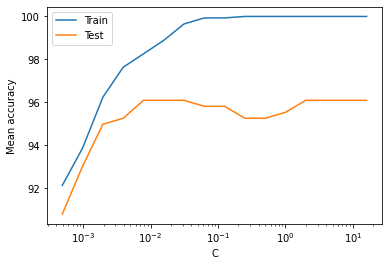

In [15]:
#Inputs
penalty = ['l1','l2','elasticnet','none'][2]
c_vals = [1.0/(2.0**s) for s in range(-4,12)]
verbose = False

#Ignore warnings otherwise output will blow up
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    #Check accuracy for different values of max_iter
    acc_train = []
    acc_test = []
    for c in c_vals:
        clf = LogisticRegression(C=c, max_iter=1000, penalty=penalty, l1_ratio=0.1, solver='saga').fit(X, y)
        acc_train.append(clf.score(X, y)*100)
        acc_test.append(clf.score(X_test, y_test)*100)
        if verbose:
            print('C                   =', c)
            print('Mean accuracy train =', acc_train[-1], '%')
            print('Mean accuracy test  =', acc_test[-1], '%')
            print('')
        
plt.semilogx(c_vals, acc_train)
plt.semilogx(c_vals, acc_test)
plt.legend(['Train','Test'])
plt.xlabel('C')
plt.ylabel('Mean accuracy')
plt.show()

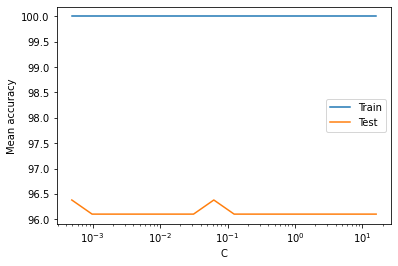

In [16]:
#Inputs
penalty = ['l1','l2','elasticnet','none'][3]
c_vals = [1.0/(2.0**s) for s in range(-4,12)]
verbose = False

#Ignore warnings otherwise output will blow up
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    #Check accuracy for different values of max_iter
    acc_train = []
    acc_test = []
    for c in c_vals:
        clf = LogisticRegression(C=c, max_iter=1000, penalty=penalty, l1_ratio=0.1, solver='saga').fit(X, y)
        acc_train.append(clf.score(X, y)*100)
        acc_test.append(clf.score(X_test, y_test)*100)
        if verbose:
            print('C                   =', c)
            print('Mean accuracy train =', acc_train[-1], '%')
            print('Mean accuracy test  =', acc_test[-1], '%')
            print('')
        
plt.semilogx(c_vals, acc_train)
plt.semilogx(c_vals, acc_test)
plt.legend(['Train','Test'])
plt.xlabel('C')
plt.ylabel('Mean accuracy')
plt.show()